# Visualization, Logistic regression, and ML modeling analysis of the Titanic dataset analysis- Part II

## Overview: continuation of Titanic dataset analysis.

## this final part will implement various regression models.

## The modeling will start with a conventional logit model (using statsmodels), including its coefficient output. 

## Next, various ML models will be implemented, such as logit (but using scikitlearn), KNN, SVC, and Random Forests. 

## Finally, the accuracy of each model will be computed, analyzed, and compared.

# Import the Titanic dataset

In [1]:
#import data analysis libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame


#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Imports the Titanic training dataset from Kaggle
df_titanic = pd.read_csv('Titanic_dataset.csv',sep=',',nrows=891)

#Displays 1st 10 rows of data.
df_titanic.head(10)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,...,with_family,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,child,female,male
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,...,True,0,0,1,0,0,1,0,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,...,True,1,0,0,1,0,0,0,1,0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,...,False,0,0,1,0,0,1,0,1,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,...,True,0,0,1,1,0,0,0,1,0
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,...,False,0,0,1,0,0,1,0,0,1
5,5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,...,False,0,1,0,0,0,1,0,0,1
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,...,False,0,0,1,1,0,0,0,0,1
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,...,True,0,0,1,0,0,1,1,0,0
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,...,True,0,0,1,0,0,1,0,1,0
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,...,True,1,0,0,0,1,0,1,0,0


# 3.)b.) Implement logistic regression models via statsmodels:

## Import logit model module from statsmodels

In [16]:
#import statsmodels library for regression models such as logistic
import statsmodels.api as sm

## Specify and run the first logit specification: i.e., covariates of the passenger class indicators (excluding pclass_3: i.e., passsenger class 3 will be the reference group) and female

## Specify the vector of covariates for the 1st specification, and add an intercept

In [17]:
#vector of covariates
X = df_titanic[['Pclass_1', 'Pclass_2', 'female']]

#add constant to the RHS of the regression model
X = sm.add_constant(X)

## Specify the outcome variable

In [18]:
#specify the column for the dependent variable
y= df_titanic['Survived']

## Specify/initialize the logit model

In [19]:
#Specify the logit model 
logit = sm.Logit(y,X)

## Finally, estimate the 1st logit model, given the specified parameters, and print:
### i.) the logit model coefficients and intercept, &
### ii.) the odds ratio for each independent variable

In [20]:
#Estimate the logit model
reg_results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.494029
         Iterations 6


## i.) Print the logistic regression Model 1 results for the coefficients and intercept.

In [21]:
#Print the logistic regression results for the coefficients and intercept.
print(reg_results.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Fri, 08 Feb 2019   Pseudo R-squ.:                  0.2581
Time:                        11:41:51   Log-Likelihood:                -440.18
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 4.318e-66
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9060      0.139    -13.697      0.000      -2.179      -1.633
Pclass_1       1.6549      0.202      8.203      0.000       1.259       2.050
Pclass_2       0.9812      0.210      4.679      0.0

## ii.) Print the odds ratio (i.e., exponentiated from the logit models' coefficients, which are in the form of log of the odds ratios)

In [22]:
print (np.exp(reg_results.params))

const        0.148678
Pclass_1     5.232407
Pclass_2     2.667568
female      10.781376
dtype: float64


# Analysis of results for Model 1:

## Both variables are highly statistically significant (at least at the 0.001 level) and have the same sign (positive). Relative to passengers from class 3, 1st and 2nd class passengers had a signficantly higher odds of survival, of about 5.23% and 2.67%, respectively. Women had a relatively larger odds of survival compared with adult men: namely, a ~10.78% higher odds of survival.

## However, we need to add additional covariates to get more precise predictions, including better estimates of the magnitudes of each variables' coefficient.

# Specify and estimate the 2nd logit model: this specification will add 7 additional variables. 

## List of the additional variables: 2 of the 3 Embarked indicator variables: Charbourg, France will be excluded (i..e, it's the reference group); SibSp (i.e., whether a passenger had a sibling or spouse); Parch (i.e., whether a passenger had a child on board); and child (i.e., whether a passenger was age 15 or younger). 

In [23]:
# Specify the vector of covariates for the 2nd specification, and add an intercept

X2 = df_titanic[['Pclass_1', 'Pclass_2', 'Embarked_Q', 'Embarked_S', 'SibSp', 'Parch', 'female','child']]

#add constant to the RHS of the regression model
X2 = sm.add_constant(X2)

In [89]:
#Specify the 2nd logit model 
logit = sm.Logit(y,X2)

In [90]:
#Estimate the logit model
reg_results2 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.422747
         Iterations 6


## i.) Print the logistic regression Model 2 results for the coefficients and intercept.

In [91]:
#Print the logistic regression Model 2 results for the coefficients and intercept.
print(reg_results2.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Thu, 07 Feb 2019   Pseudo R-squ.:                  0.3652
Time:                        12:22:53   Log-Likelihood:                -376.67
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.383e-88
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0021      0.269     -7.450      0.000      -2.529      -1.475
Pclass_1       2.0461      0.244      8.400      0.000       1.569       2.523
Pclass_2       1.0860      0.243      4.461      0.0

## ii.) Exponentiate the coefficients, and print the odds ratios for Model 2's variables

In [92]:
print (np.exp(reg_results2.params))

const          0.135049
Pclass_1       7.737621
Pclass_2       2.962432
Embarked_Q     0.749658
Embarked_S     0.599847
SibSp          0.638548
Parch          0.787182
female        25.108313
child         34.194075
dtype: float64


# What do the logit regression model results (via the statsmodels library) show for Model 2? 

## It appears that all but 1 of the variables are moderately to highly statistically significant (only the Embarked_q variable failed to achieve signficance). In fact, 5 of the 8 variables are signficant at the 1% level, and the Parch variable (i.e., parents with children) and Embarked_s variables are signficant at the 5% level.

## Given the increase in the pseudo-R-squared coefficient of more than 11% relative to Model 1, including the Embarked indicator variables clearly explains a larger chunk of the variation in the passengers' odds of surviving the Titanic.

##  However, 4 of the variables show a statistically significant reduction in the probability that an individual would have survived the Titanic. 

## Namely, a.) being in a more expensive passenger class -- passenger classes 1 or 2, respectively, relative to class 3; b.) being an adult female (i.e., relative to adult males); and c.) children (regardless of gender) all were associated  with lower odds of survival. 

## For example, those with a passenger 1 class had a ~7.74% greater odds of survival relative to those from passenger class 3. Passenger class 2  individuals had less of a substantial boost to their survival odds relative to class 3, but still had a nearly 3% higher odds of survival (more precisely, 2.96%). 

## On the other hand, 4 of the variables were associated with a significant increase in the odds of surviving the Titanic.

## For example, passengers who were either adult females or children regardless of gender. Those who were children were the most likely to survive the Titanic, with adult female passengers also having a fairly high increase in the odds of their survival, relative to adult male passengers, holding constant passenger class. 

## In fact, the magnitude of the child variable or even that of the female variable is even higher than the other variables combined (i.e., passenger class 1 and 2, sibling/spouse, and parents with children). Thus, children and women from even the least-expensive passenger class (i.e., class 3) appear to have been quite a bit more likely to survive than adult male passengers who were on board with the most expensive passenger classes.

## Namely, children on average had a 34.19% higher odds of surviving the Titanic than adults were, and female adults had a 25.11% higher odds of survival than adult men. 


## In short, the results of the data suggests the prevailing claim that ships in accidents/wrecks would try to prioritize and save women and children first (adult men being the lowest on the priority list) is by and large quite true for the Titanic.

# Prepare data for final logit specification (Model 3): delete all rows with null values for Age; this way, a model can be run with Age as a variable

In [24]:
#Drop all null values from the dataframe
#assign this to a new dataframe to avoid losing the extra data from the original dataframe
df_titanic_rev = df_titanic.dropna()

In [25]:
#show the new dataframe
df_titanic_rev

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,with_family,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,child,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,True,0,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,True,1,0,0,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,False,0,0,1,0,0,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,True,0,0,1,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,False,0,0,1,0,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,False,0,0,1,1,0,0,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,True,0,0,1,0,0,1,1,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,True,0,0,1,0,0,1,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,True,1,0,0,0,1,0,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,...,True,0,0,1,0,0,1,1,0,0


In [26]:
#reindex the data since the passenger ID alignment has been changed
df_titanic_rev = df_titanic_rev.reindex()

## Notice that the greater than 100 null values (all nulls were from the Age column) have been deleted for this new dataframe. The sample size is now 714

# Re-estimate summary statistics for this sample

In [27]:
df_titanic_rev.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,child,female,male
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.182073,0.039216,0.778711,0.260504,0.242297,0.497199,0.116246,0.305322,0.578431
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.386175,0.194244,0.415405,0.439217,0.428773,0.500343,0.320745,0.460867,0.494156
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## summary statistics grouped by gender:

In [105]:
avg_survival_gender = df_titanic_rev.groupby('female')['Survived'].mean()

avg_survival_gender

female
0    0.243952
1    0.775229
Name: Survived, dtype: float64

# Specify, estimate, and analyze Model 3: specification adding Age variable with the dataset restricted to exclude all null Age values

In [29]:
## Specify the vector of covariates for the 3rd specification, and add an intercept

X3 = df_titanic_rev[['Pclass_1','Pclass_2', 'Age','Embarked_Q', 'Embarked_S', 'SibSp', 'Parch', 'female', 'child']]

#add constant to the RHS of the regression model
X3 = sm.add_constant(X3)

## re-specify the outcome variable since the rows of data from the  original dataframe data and the new dataframe are not alligned properly

In [30]:
#respecify the dependent variable since the data are not aligned to the original Y variable
y2 = df_titanic_rev['Survived']

In [31]:
#Specify the 2nd logit model 
logit = sm.Logit(y2,X3)

In [32]:
#Estimate the logit model
reg_results3 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.418262
         Iterations 6


## i.) Print the logistic regression Model 3 results for the coefficients and intercept.

In [33]:
#Print the logistic regression Model 2 results for the coefficients and intercept.
print(reg_results3.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            9
Date:                Fri, 08 Feb 2019   Pseudo R-squ.:                  0.3807
Time:                        13:44:33   Log-Likelihood:                -298.64
converged:                       True   LL-Null:                       -482.26
                                        LLR p-value:                 1.324e-73
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2421      0.415     -2.992      0.003      -2.056      -0.428
Pclass_1       2.4906      0.309      8.050      0.000       1.884       3.097
Pclass_2       1.1365      0.263      4.318      0.0

# Analysis of Model 3:

## Adding in the Age variable has apparently reduced the statistical signficance of a few other variables--Embarked_S and Parch--possibly due to high mutlicollienarity with Age.

## To help ascertain whether these variables are different primarily due to multicollinearity, let's calculate the variance inflation factor (VIF) of the variables for Model 3. Then we can return to the analysis of the logit model's results.

# Calculate VIF for Model 3 covariates

In [48]:
#import the VIF module from the statsmodels library
from statsmodels.stats.outliers_influence import variance_inflation_factor

#calculate the VIF for X3 (i.e., the covariates from the multivariate OLS model):
pd.Series([variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])],
          index=X3.columns)

const         15.769758
Pclass_1       1.533425
Pclass_2       1.204124
Age            1.754586
Embarked_Q     1.248599
Embarked_S     1.336747
SibSp          1.418067
Parch          1.302055
female         1.215283
child          2.079716
dtype: float64

## Somewhat surprisingly, none of the individual covariates has a high VIF. The cummulative VIF, however, is fairly high, at 15.77. As a result, there is no dire need to re-estimate the model with fewer covaraites.

## ii.) Exponentiate the coefficients, and print the odds ratios for Model 2's variables

In [72]:
print (np.exp(reg_results3.params))

const          0.288767
Pclass_1      12.068745
Pclass_2       3.115940
Age            0.973152
Embarked_Q     0.342330
Embarked_S     0.645110
SibSp          0.597947
Parch          0.824519
female        24.563552
child         19.645660
dtype: float64


# Analysis of Model 3- cont'd:

## Once again, most variables are highly significant, although now the parents with children variable as well as both Embarked indicators are insignificant. 

## As expected, Age did play a signficant role in affecting the odds of surviving the Titanic. For each year older a passenger was, his or her odds of survival decreased by 0.97%. Given the sample average is ~29.7, holding all other variables constant (e.g., passenger class, gender), a passenger with this average age would have had an expected 28.9% lower odds of survival than babies/infants and a 14.30% lower odds of survival than the oldest children on board (i.e., those whose age was 15).

## Somewhat surprisingly, however, the magnitude of the female variable outweighs that of the child variable. I.e., the model predicts that women were more likely to have survived the Titanic relative to men than children were compared with adults. 

## Both of these variables still have fairly high magnitudes, however, so these results might still be consistent with the earlier scatter plots. In addition, incorporating Age as a variable may affected the magnitudes of the variables such that the formerly higher magnitude of the child variable is now being partly reflected by the predicted effects of Age itself.

## For example, the model suggests that children had a 19.65% higher odds of surviving the Titanic than adults. Women had a 24.56% higher odds of survival than men. However, referring back to the "summary stats for women" figure, the age ranges of women in the dataset are from 16 to 63, so clearly some women were far older than any of the children on board the Titanic. Since the Age coefficient is negative, not positive, the older a Woman was, the less likely she would have been to survive the Titanic relative to children. Thus, the results for this model may in fact be accurate.

# 3.)c.) Implement logistic regression models via the scikitlearn library to implement Machine Learning methods for their estimation

## Import various scikitlearn modules for implementing logit regression, bifurcating the dataset into a training and test/validation dataset, and metrics for accuracy of the given logit model

In [2]:
#import scikitlearn's Logit model module
from sklearn.linear_model import LogisticRegression
#import metrics as well, so the accuracy of the model can be computed
from sklearn import metrics
#import sklearn's module for randomly partitioning the data into a training and test dataset
from sklearn.model_selection import train_test_split

# Bifurcate the dataset, derive predictions from the logit model

# Calculate the overall accuracy of the ML logistic regressions

# Start with the same specification as Model 1

In [77]:
#initialize an empty Logistic model, which can then be fitted with the training data
logit_4 = LogisticRegression()


#randomly bifurcate the X and Y vectors into 2 datasets: one for training; one for the test/validation
X_train, X_test, y_train, y_test = train_test_split(X,y)

#fit model using the training dataset as parameters
logit_4.fit(X_train, y_train)

#use the validation/test dataset to compute the logit model's predictions
ml_predict = logit_4.predict(X_test)

#use the metrics module's "accuracy_score method to compute the overall accuracy of the '
#specification from Model 1, which wasimplemented via supervised ML methods
print(metrics.accuracy_score(y_test, ml_predict))

0.7443946188340808


/Users/kevinallen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Estimate accuracy for specification from Model 2

In [78]:
#randomly bifurcate the X and Y vectors into 2 datasets: one for training; one for the test/validation
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y)

#fit model using the training dataset as parameters
logit_4.fit(X_train2, y_train2)

#use the validation/test dataset to compute the logit model's predictions
ml_predict = logit_4.predict(X_test2)

#use the metrics module's "accuracy_score method to compute the overall accuracy of the '
#specification from Model 1, which wasimplemented via supervised ML methods
print(metrics.accuracy_score(y_test2, ml_predict))

0.820627802690583


/Users/kevinallen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Estimate accuracy for specification from Model 3

In [79]:
#randomly bifurcate the X and Y vectors into 2 datasets: one for training; one for the test/validation
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y2)

#fit model using the training dataset as parameters
logit_4.fit(X_train3, y_train3)

#use the validation/test dataset to compute the logit model's predictions
ml_predict = logit_4.predict(X_test3)

#use the metrics module's "accuracy_score method to compute the overall accuracy of the '
#specification from Model 1, which wasimplemented via supervised ML methods
print(metrics.accuracy_score(y_test3, ml_predict))

0.8100558659217877


/Users/kevinallen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Analysis of scikitlearn accuracy scores, and Concluding thoughts:

## Each sbsequent logistic model had an increased accuracy, although Model 3 only had a ~0.6% increase in accuracy relative to Model 2. Thus, including Age as a variable did not bring about a big increase in accuracy, implying that most of the variation resulting from age with respect to the odds of survival was already encapsualted by related variables such as child (i.e., equals 1 for passengers age 15 or younger) with 

## By contrast, Model 2 added a modest increase in accuracy relative to Model 1: namely, a greater than 7% increase in accuracy. Thus, various demographic variables, especially those pertaining to age (e.g., whether a passenger is a child), appear to have explained a fair amount of the odds of surviving the Titanic.

## After adding in the Age variable, the accuracy of the models actually decreases slightly relative to Model 2. 

## While this unexpected result may be due to sampling error (i.e., sampling error resulting from bifurcating the dataset into a training and test dataset), the ML-implmented logit model results suggest that Model 2 is the most accuracte of the specifications.  If one were to take any one of the passengers in the dataset at random, Model 2 will derive an accurate prediction 82.06% of the time, on average.

# Ideas for Further analysis:

# Use the same specifications, and implement different models for predicitng the odds of surviving the Titanic: e.g., support vector machines (SVM), kernel density estimation (KDE).

# Use additional specifications for further sensitivity analysis.
# Compare the accuracy and magnitudes for each model.



# K-nearest neighbors (KNN) estimation of the 3 specifications:

# import KNN module, and initialize and fit the KNN model for specification from Model 1

# Start with 6 kernels, but later calculate the optimal number of kernels, and re-estimate the KNN models using this derived optimal # of kernels

In [111]:
#import KNN classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

#initialize a KNN model, and start with 4 kernels
knn = KNeighborsClassifier(n_neighbors=4)

#fit the training dataset from specification from Model 1 into the KNN model
knn.fit(X_train,y_train)

#derive predictions from the KNN model using the test/validation dataset
y_pred = knn.predict(X_test)

#print the accuracy of this KNN model
print(metrics.accuracy_score(y_test,y_pred))

0.7443946188340808


## Notice the accuracy is only 65.02%, a nearly 10% lower accuracy relative to the Model 1 specification derived from via a scikitlearn logistic regression. 

## This unexpected reduction in accuracy may not be so surprising, however, when we consider the possibility that 6 is not the optimal number of kernels.

# Calculate the optimal number of kernels from 1 to 100 kernels, given the variables and data from Specification/Model 1.

# Then, plot the accuracy scores for different kernels:

Text(0, 0.5, 'Testing Accuracy')

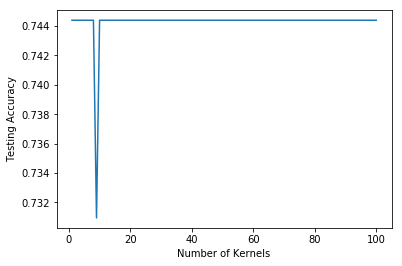

In [112]:
k_range = range(1,101)

accuracy = []

for k in k_range:
    #I.e., iterate on the specified range of k for values 1 through 25
    knn = KNeighborsClassifier(n_neighbors = k)
    #Evalute the knn algorithm for each value of k
    
    #Fit the knn model with the training dataset
    knn.fit(X_train, y_train)
    #calculate the KNN model's predictions for each number of kernels specified in the range
    y_pred = knn.predict(X_test)
    
    #append the knn models' accuracy for each value of k to the accuracy list
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range,accuracy)
plt.xlabel('Number of Kernels')
plt.ylabel('Testing Accuracy')


## Show the max value of accuracy for KNN implementation of Model 1

In [105]:
#find the max value of the accuracy list
maxacc = max(accuracy)
print(maxacc)

0.7443946188340808


## Show the index the element that is NOT a maximum in terms of accuracy by number of kernels

In [110]:
#Find the index of element that is NOT a maxmimum
[a for a, b in enumerate(accuracy) if b !=maxacc]

[8]

## Surprisingly, the accuracy does not vary much at all based on the number of kernels Only at 1 particular number of kernels--9 kernels--does the accuracy diminish whatsoever from its maximum level. Even 9 kernels leads to a decrease of less than 1.5% in accuracy.

## In short, the KNN model for specification 1 has a 74.44% accuracy, which ironically is the same as that of the ML-implemented logit model.

## Next, let's run through the same procedures and estimate KNN models for the other 2 specifications.

# KNN model for 2nd specification: Calculate accuracy for kernel numbers ranging from 1 to 100

In [ ]:
k_range = range(1,101)

accuracy2 = []

for k in k_range:
    #I.e., iterate on the specified range of k for values 1 through 25
    knn = KNeighborsClassifier(n_neighbors = k)
    #Evalute the knn algorithm for each value of k
    
    #Fit the knn model with the training dataset
    knn.fit(X_train2, y_train2)
    #calculate the KNN model's predictions for each number of kernels specified in the range
    y_pred2 = knn.predict(X_test2)
    
    #append the knn models' accuracy for each value of k to the accuracy list
    accuracy2.append(metrics.accuracy_score(y_test2, y_pred2))

## Verify what the max accuracy is for the 2nd specification via KNN

In [129]:
maxacc2 = max(accuracy2)
maxacc2

0.8295964125560538

## Find the index for all elements that are a maximum in terms of KNN accuracy

In [131]:
#Find the index of element that is NOT a maxmimum
[a for a, b in enumerate(accuracy2) if b == maxacc2]

[8]

# KNN model for 2nd specification with optimal number of kernels=9:

In [186]:
#initialize a KNN model, and start with 9 kernels
knn = KNeighborsClassifier(n_neighbors=9)

#fit the training dataset from specification from Model 1 into the KNN model
knn.fit(X_train2,y_train2)

#derive predictions from the KNN model using the test/validation dataset
y_pred2 = knn.predict(X_test2)

#print the accuracy of this KNN model
print(metrics.accuracy_score(y_test2,y_pred2))

0.8295964125560538


# Analysis of KNN specification 2:

## While not a substantial improvement, the optimal KNN model for specification 2 shows a modest ~0.84% increase in accuracy relative to the logit model.

# KNN model for 2nd specification: Calculate accuracy for kernel numbers ranging from 1 to 100

In [150]:
k_range = range(1,101)

accuracy3 = []

for k in k_range:
    #I.e., iterate on the specified range of k for values 1 through 25
    knn = KNeighborsClassifier(n_neighbors = k)
    #Evalute the knn algorithm for each value of k
    
    #Fit the knn model with the training dataset
    knn.fit(X_train3, y_train3)
    #calculate the KNN model's predictions for each number of kernels specified in the range
    y_pred3 = knn.predict(X_test3)
    
    #append the knn models' accuracy for each value of k to the accuracy list
    accuracy3.append(metrics.accuracy_score(y_test3, y_pred3))

## Verify what the max accuracy is for specification 3 via KNN modeling

In [151]:
maxacc3 = max(accuracy3)
maxacc3

0.7821229050279329

## Find the index for all elements that are a maximum in terms of accuracy

In [152]:
#Find the index of element that is NOT a maxmimum
[a for a, b in enumerate(accuracy3) if b == maxacc3]

[2]

# Estimate KNN specification 3 with optimal kernels = 3

In [154]:
#initialize a KNN model, and start with 3 kernels
knn = KNeighborsClassifier(n_neighbors=3)

#fit the training dataset from specification from Model 1 into the KNN model
knn.fit(X_train3,y_train3)

#derive predictions from the KNN model using the test/validation dataset
y_pred3 = knn.predict(X_test3)

#print the accuracy of this KNN model
print(metrics.accuracy_score(y_test3,y_pred3))

0.7821229050279329


# Analysis of KNN specification 3:

## Ironically, the optimal KNN model for specification 3 has a lower accuracy than the logit model! This could be due to sample error when the dataset was birfurcated into a test and training dataset. Alternatively (or possibly in addition), it could be that the 3rd specification is inferior to specification 2 in terms of predictive accuracy. This could result from the Age variable not adding much additional predictive capacity to the model. A final possibility--which might very well be the most plausible since multicolliniarity was not exceptionally high for the Age variable in the logit model--is that the data points that were deleted in the sample for specification 3 may have contained particularly useful, additive information that helped improve overall predictive accuracy for specifications 2 and 3.

# For ease of reference, show accuracy for each KNN specification, stacked on top of each other

In [187]:
print(metrics.accuracy_score(y_test,y_pred)), print(metrics.accuracy_score(y_test2,y_pred2)), print(metrics.accuracy_score(y_test3,y_pred3))

0.7443946188340808
0.8295964125560538
0.7821229050279329


(None, None, None)

# Comparison of logit and KNN models:

## KNN models did not add much in terms of accuracy for the various specifications, even reducing accuracy for specification 3. However, accuracy was slightly higher for specification 2 via the KNN model, which is the highest level of accuracy for any of the models estimated thus far.

# Estimate support vector clustering (SVC) models for each specification:

# SVC for specification 1:

In [167]:
#import SVC module from sklearn:
from sklearn.svm import SVC, LinearSVC

#initialize an empty SVC object/model
svc = SVC()
#fit the training dataset from specification from Model 1 into the KNN model
svc.fit(X_train,y_train)

#derive predictions from the KNN model using the test/validation dataset
svc_pred = svc.predict(X_test)

#print the accuracy of specification 1 via SVC
print(metrics.accuracy_score(y_test,svc_pred))

0.7443946188340808


/Users/kevinallen/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# SVC for specification 2

In [173]:
#import SVC module from sklearn:
from sklearn.svm import SVC, LinearSVC

#initialize an empty SVC object/model
svc = SVC()
#fit the training dataset from specification from Model 1 into the KNN model
svc.fit(X_train2,y_train2)

#derive predictions from the KNN model using the test/validation dataset
svc_pred2 = svc.predict(X_test2)

#print the accuracy of this SVC model
print(metrics.accuracy_score(y_test2,svc_pred2))

0.8385650224215246


/Users/kevinallen/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# SVC for specification 3

In [170]:
#import SVC module from sklearn:
from sklearn.svm import SVC, LinearSVC

#initialize an empty SVC object/model
svc = SVC()
#fit the training dataset from specification from Model 1 into the KNN model
svc.fit(X_train3,y_train3)

#derive predictions from the KNN model using the test/validation dataset
svc_pred3 = svc.predict(X_test3)

#print the accuracy of this KNN model
print(metrics.accuracy_score(y_test3,svc_pred3))

0.776536312849162


/Users/kevinallen/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# For ease of reference, show accuracy for each SVC specification, stacked on top of each other

In [183]:
print(metrics.accuracy_score(y_test,svc_pred)), print(metrics.accuracy_score(y_test2,svc_pred2)), print(metrics.accuracy_score(y_test3,svc_pred3))

0.7443946188340808
0.8385650224215246
0.776536312849162


(None, None, None)

# Analysis of SVC results:

## While the accuracy was fairly similar between the KNN and SVC models, the 2nd specificaiton for the SVC models is, thus far, the most accurate. It improved accuracy relative to the 2nd specification KNN model by nearly 1%, such that the accuracy for this SVC model is nearly 83.9%.

# Implement Random Forest Classifier models for each specification:


# Random Forest classifier, specification 1:

In [161]:
#import the RandomForest module
from sklearn.ensemble import RandomForestClassifier

#initialize a Random forest model/object
rf = RandomForestClassifier()

#fit/train the model
rf.fit(X_train, y_train)

#calculate prediction
rf_pred = rf.predict(X_test)

#print accuracy of this model
print(metrics.accuracy_score(y_test, rf_pred))

0.7443946188340808


/Users/kevinallen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



# Random Forest classifier, specification 2:

In [162]:
#import the RandomForest module
from sklearn.ensemble import RandomForestClassifier

#initialize a Random forest model/object
rf = RandomForestClassifier()

#fit/train the model
rf.fit(X_train2, y_train2)

#calculate prediction
rf_pred2 = rf.predict(X_test2)

#print accuracy of this model
print(metrics.accuracy_score(y_test2, rf_pred2))

0.8161434977578476


/Users/kevinallen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



# Random Forest classifier, specification 3:

In [163]:
#import the RandomForest module
from sklearn.ensemble import RandomForestClassifier

#initialize a Random forest model/object
rf = RandomForestClassifier()

#fit/train the model
rf.fit(X_train3, y_train3)

#calculate prediction
rf_pred3 = rf.predict(X_test3)

#print accuracy of this model
print(metrics.accuracy_score(y_test3, rf_pred3))

0.7653631284916201


/Users/kevinallen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# For ease of reference, show comparison of all Random Forest classifier specifications stacked on top of each other

In [165]:
print(metrics.accuracy_score(y_test, rf_pred)), print(metrics.accuracy_score(y_test2, rf_pred2)), print(metrics.accuracy_score(y_test3, rf_pred3))

0.7443946188340808
0.8161434977578476
0.7653631284916201


(None, None, None)

# Analysis of RandomForest results:

## Out of each of the models, the RandomForest classifier did the poorest in terms of predictive accuracy. 

## For instance, even the logit and KNN models (aside from the 3rd specificaiton of the logit, which may have been merely due to sample error)--neither of which performed as well as the SVC specification 2 model--provided better accuracy than the Random Forest for each specification. 

# Summary of results:

## Overall, the most accurate specification, which was fairly consistent for most of the different ML models that were implemented, is specification 2, which includes most of the variables used in this notebook except Age. Variables such as Parch (parents with children) and child (i.e., indicates whether a passenger was a child during the boarding of the Titanic) likely capture much of the variation and predictive capacity of differences in age and its effects on the odds of surviving the Titanic.

## In addition, different machine learning models clearly had some variation in terms of their accuracy, helping emphasize the importance of considering the assumptions, pros, and cons of using different models, even when the only goal is to predict phenomena (as opposed to doing more complicated analysis, such as causal inference). 

## Of all of the machine learning models, the 2nd specification for the SVC provided the highest overall accuracy: namely, a respectably high (though not ideal) 83.86% accuracy.